# CODING TASK #1: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

  Using cached setuptools-62.2.0-py3-none-any.whl (1.1 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.5.0
    Uninstalling setuptools-59.5.0:
      Successfully uninstalled setuptools-59.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytorch-lightning 1.5.10 requires setuptools==59.5.0, but you have setuptools 62.2.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 139.5 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 62.2.0
    Uninstalling setuptools-62.2.0:
      Successfully uninstalled setuptools-62.2.0


In [ ]:
# pip install autogluon autogluon.tabular "mxnet<2.0.0"

In [3]:
# AutoGluon is modularized into sub-modules for: 1. Tabular, 2. text, 3.Images
from autogluon.tabular import TabularDataset, TabularPredictor

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
insurance_df = pd.read_csv('insurance.csv')

In [5]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**PRACTICE OPPORTUNITY #1 [OPTIONAL]:** 
- **How many unique regions do we have in the insurance_df DataFrame?**

In [8]:
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# CODING TASK #2: PERFORM EXPLORATORY DATA ANALYSIS 

In [9]:
# Explore the first five rows in the DataFrame
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
# Explore the last five rows in the DataFrame
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [11]:
# Generate statistical summary
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
# Obtain dataset information
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region = insurance_df.groupby(by='region').mean()
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
- **Group data by 'age' and examine the relationship between 'age' and 'charges'**

In [14]:
df_age = insurance_df.groupby(by = 'age').mean()
df_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


# CODING TASK #3: PERFORM DATA VISUALIZATION

<AxesSubplot:>

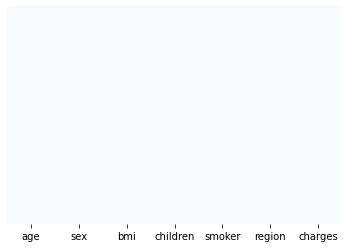

In [15]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [16]:
# check if there are any Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

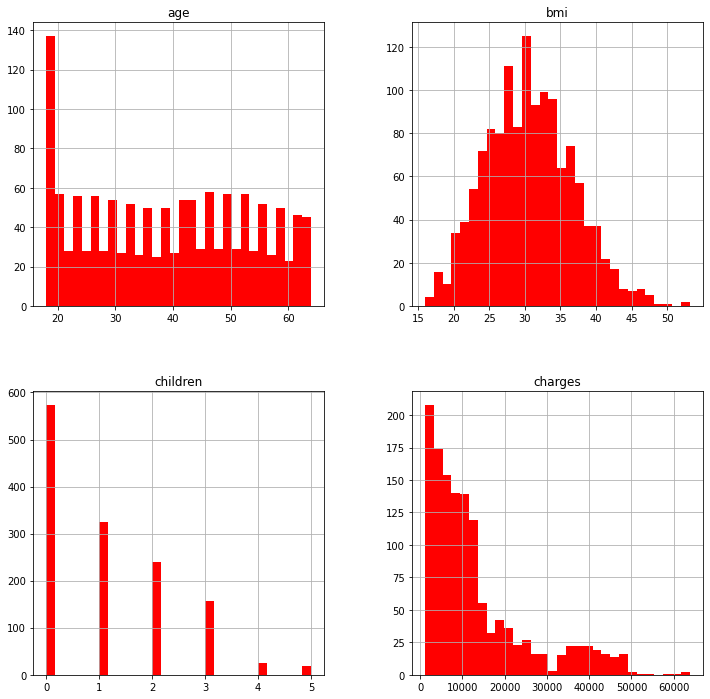

In [17]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (12, 12), color = 'r');


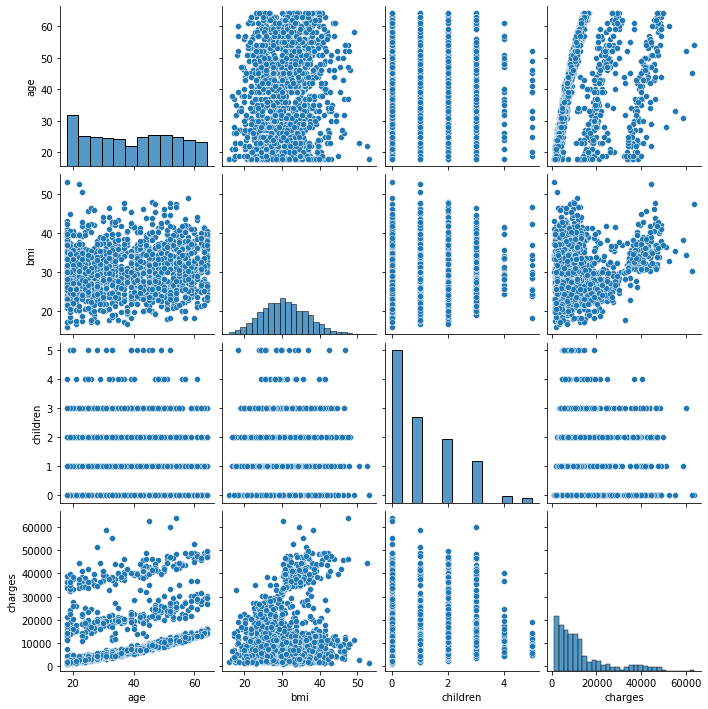

In [18]:
# plot pairplot
sns.pairplot(insurance_df)

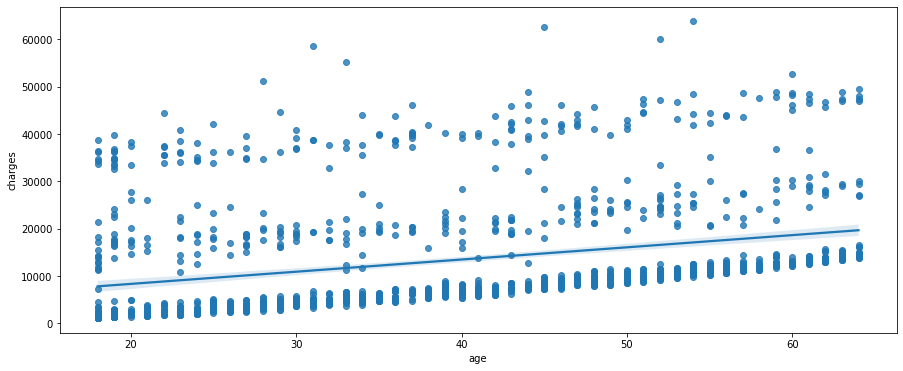

In [19]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()
  

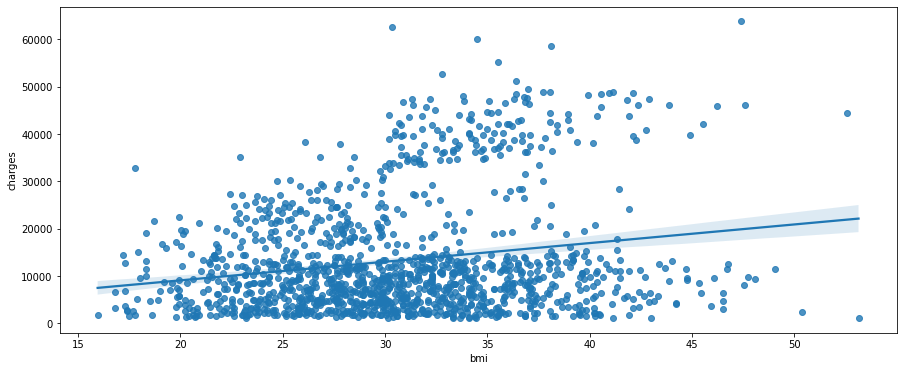

In [20]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()
  

**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
 - **Calculate and plot the correlation matrix**
 - **Which feature has the most positive correlation with charges?**

In [21]:
insurance_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

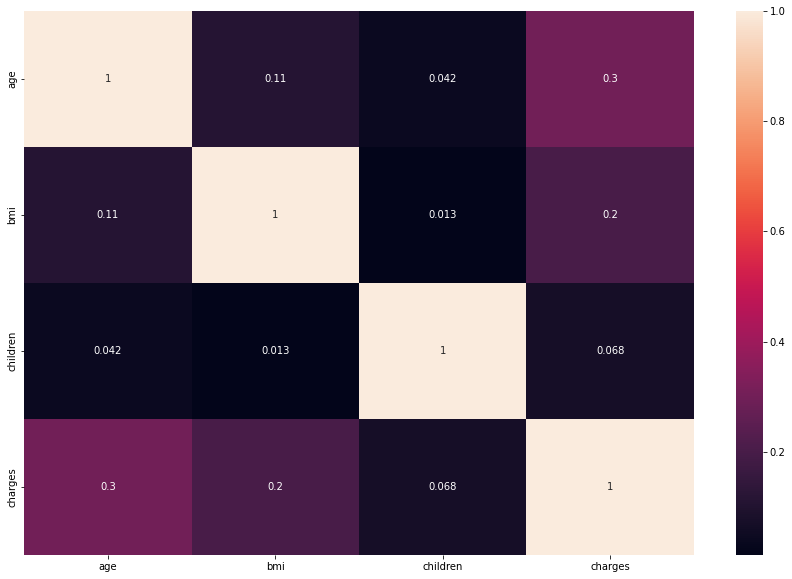

In [23]:
plt.figure(figsize = (15, 10))
sns.heatmap(insurance_df.corr(), annot = True)

# CODING TASK #4: TRAIN MULTIPLE MODELS USING AUTOGLUON

In [24]:
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(insurance_df, test_size=0.2, random_state=0)

In [25]:
X_train

,age,sex,bmi,children,smoker,region,charges
621,37,male,34.100,4,yes,southwest,40182.24600
194,18,male,34.430,0,no,southeast,1137.46970
240,23,female,36.670,2,yes,northeast,38511.62830
1168,32,male,35.200,2,no,southwest,4670.64000
1192,58,female,32.395,1,no,northeast,13019.16105
...,...,...,...,...,...,...,...
763,27,male,26.030,0,no,northeast,3070.80870
835,42,male,35.970,2,no,southeast,7160.33030
1216,40,male,25.080,0,no,southeast,5415.66120
559,19,male,35.530,0,no,northwest,1646.42970


In [26]:
X_test

,age,sex,bmi,children,smoker,region,charges
578,52,male,30.200,1,no,southwest,9724.53000
610,47,female,29.370,1,no,southeast,8547.69130
569,48,male,40.565,2,yes,northwest,45702.02235
1034,61,male,38.380,0,no,northwest,12950.07120
198,51,female,18.050,0,no,northwest,9644.25250
...,...,...,...,...,...,...,...
1084,62,female,30.495,2,no,northwest,15019.76005
726,41,male,28.405,1,no,northwest,6664.68595
1132,57,male,40.280,0,no,northeast,20709.02034
725,30,female,39.050,3,yes,southeast,40932.42950


In [27]:
# Train multiple ML regression models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets 
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column
# For regression type problems, 'label' values are generally floating point non-integers with large number of unique values

predictor = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'r2').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220514_055719/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20220514_055719/"
AutoGluon Version:  0.4.0
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    1070
Train Data Columns: 6
Label Column: charges
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2828.95 MB
	Train Data (Original)  Memory Usage: 0.23 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting Identity

In [28]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.849274       0.680082  104.830531                0.000569           0.637848            2       True         11
1      WeightedEnsemble_L3   0.848304       1.455766  173.969942                0.000775           0.159658            3       True         14
2          CatBoost_BAG_L1   0.846672       0.055652   15.388798                0.055652          15.388798            1       True          6
3        LightGBMXT_BAG_L2   0.846226       1.354680  153.217326                0.257922          31.768535            2       True         12
4          LightGBM_BAG_L2   0.841086       1.197069  142.041748                0.100312          20.592958            2       True         13
5        LightGBMXT_BAG_L1   0.840820       0.060853   16.397238                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -0.07448567993942246,
  'KNeighborsDist_BAG_L1': -0.16102308298670942,
  'LightGBMXT_BAG_L1': 0.8408198040276409,
  'LightGBM_BAG_L1': 0.8396145120831351,
  'RandomForestM

# CODING TASK #5: EVALUATE TRAINED MODELS PERFORMANCE

In [29]:
predictor.leaderboard()

                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.849274       0.680082  104.830531                0.000569           0.637848            2       True         11
1      WeightedEnsemble_L3   0.848304       1.455766  173.969942                0.000775           0.159658            3       True         14
2          CatBoost_BAG_L1   0.846672       0.055652   15.388798                0.055652          15.388798            1       True          6
3        LightGBMXT_BAG_L2   0.846226       1.354680  153.217326                0.257922          31.768535            2       True         12
4          LightGBM_BAG_L2   0.841086       1.197069  142.041748                0.100312          20.592958            2       True         13
5        LightGBMXT_BAG_L1   0.840820       0.060853   16.397238                0.060853          16.397238            1       True          3

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.849274,0.680082,104.830531,0.000569,0.637848,2,True,11
1,WeightedEnsemble_L3,0.848304,1.455766,173.969942,0.000775,0.159658,3,True,14
2,CatBoost_BAG_L1,0.846672,0.055652,15.388798,0.055652,15.388798,1,True,6
3,LightGBMXT_BAG_L2,0.846226,1.354680,153.217326,0.257922,31.768535,2,True,12
4,LightGBM_BAG_L2,0.841086,1.197069,142.041748,0.100312,20.592958,2,True,13
5,LightGBMXT_BAG_L1,0.840820,0.060853,16.397238,0.060853,16.397238,1,True,3
6,LightGBM_BAG_L1,0.839615,0.055021,16.399790,0.055021,16.399790,1,True,4
7,NeuralNetFastAI_BAG_L1,0.836500,0.173794,28.658913,0.173794,28.658913,1,True,8
8,XGBoost_BAG_L1,0.833380,0.069809,13.795222,0.069809,13.795222,1,True,9
9,NeuralNetTorch_BAG_L1,0.832018,0.176974,28.492961,0.176974,28.492961,1,True,10


                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.849274       0.680082  104.830531                0.000569           0.637848            2       True         11
1      WeightedEnsemble_L3   0.848304       1.455766  173.969942                0.000775           0.159658            3       True         14
2          CatBoost_BAG_L1   0.846672       0.055652   15.388798                0.055652          15.388798            1       True          6
3        LightGBMXT_BAG_L2   0.846226       1.354680  153.217326                0.257922          31.768535            2       True         12
4          LightGBM_BAG_L2   0.841086       1.197069  142.041748                0.100312          20.592958            2       True         13
5        LightGBMXT_BAG_L1   0.840820       0.060853   16.397238                0.060853          16.397238            1       True          3

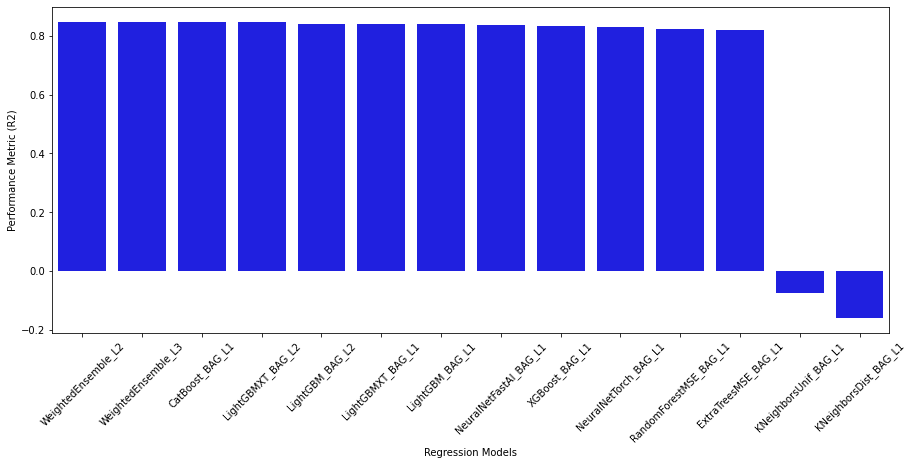

In [30]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);


In [31]:
predictor.evaluate(X_test)

Evaluation: r2 on test data: 0.9031271033276411
Evaluations on test data:
{
    "r2": 0.9031271033276411,
    "root_mean_squared_error": -3926.242529124714,
    "mean_squared_error": -15415380.397507632,
    "mean_absolute_error": -2343.5516691847015,
    "pearsonr": 0.9509619378580628,
    "median_absolute_error": -1478.5523824218753
}


{'r2': 0.9031271033276411,
 'root_mean_squared_error': -3926.242529124714,
 'mean_squared_error': -15415380.397507632,
 'mean_absolute_error': -2343.5516691847015,
 'pearsonr': 0.9509619378580628,
 'median_absolute_error': -1478.5523824218753}

In [32]:
# assess model performance
# Pick 5 test datasets and generate predictions
y_pred = predictor.predict(X_test)
print("Predictions:  ", list(y_pred)[:5])

Predictions:   [11411.03125, 10037.572265625, 45402.2578125, 13510.955078125, 10514.2978515625]


In [33]:
X_test

,age,sex,bmi,children,smoker,region,charges
578,52,male,30.200,1,no,southwest,9724.53000
610,47,female,29.370,1,no,southeast,8547.69130
569,48,male,40.565,2,yes,northwest,45702.02235
1034,61,male,38.380,0,no,northwest,12950.07120
198,51,female,18.050,0,no,northwest,9644.25250
...,...,...,...,...,...,...,...
1084,62,female,30.495,2,no,northwest,15019.76005
726,41,male,28.405,1,no,northwest,6664.68595
1132,57,male,40.280,0,no,northeast,20709.02034
725,30,female,39.050,3,yes,southeast,40932.42950


In [34]:
y_test = X_test['charges']
y_test #groundtruth

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1084    15019.76005
726      6664.68595
1132    20709.02034
725     40932.42950
963      9500.57305
Name: charges, Length: 268, dtype: float64

Text(0.5, 0, 'True Values')

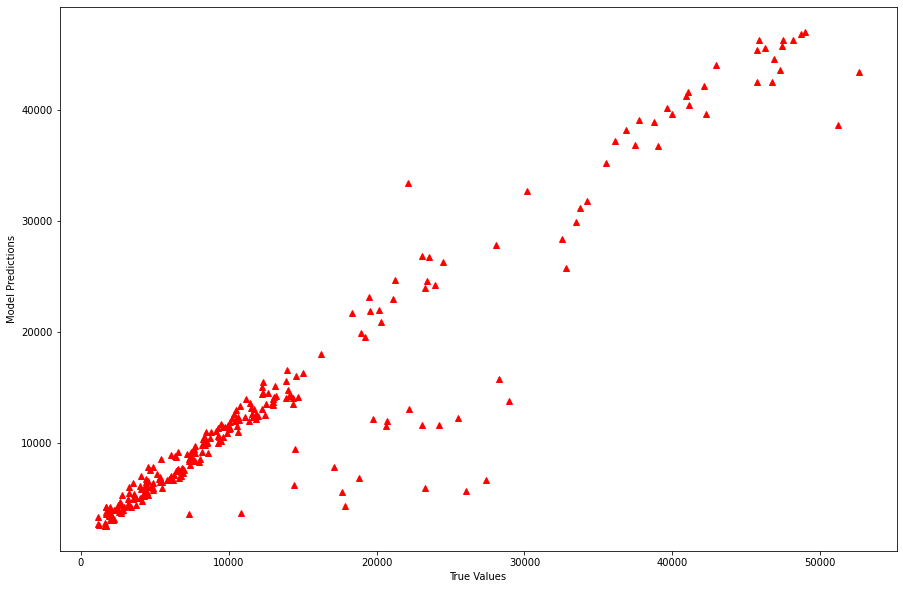

In [36]:
y_predict = predictor.predict(X_test)
plt.figure(figsize = (15, 10))
plt.plot(y_test, y_predict, "^", color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')


In [37]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 3926.243 
MSE = 15415380.397507632 
MAE = 2343.5516691847015 
R2 = 0.9031271033276411 
Adjusted R2 = 0.90051898687877


**PRACTICE OPPORTUNITY #4 [OPTIONAL]:**
- **Retrain a regressor model using AutoGluon with different preset value**
- **Set the limit_time to 300 secs**
- **Use RMSE as the key metric and plot the barchart**
- **Which model provides the best performance?**
- **Assess trained model performance by comparing various metrics**

# PRACTICE OPPORTUNTY SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:** 
- **How many unique regions do we have in the insurance_df?**

In [ ]:
insurance_df['region'].unique()

**PRACTICE OPPORTUNITY #2 SOLUTION:**
- **Group data by 'age' and examine the relationship between 'age' and 'charges'**

In [ ]:
df_age = insurance_df.groupby(by = 'age').mean()
df_age

**PRACTICE OPPORTUNITY #3 SOLUTION:**
 - **Calculate and plot the correlation matrix**
 - **Which feature has the most positive correlation with charges?**

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(insurance_df.corr(), annot = True);
# smoker and age have positive correlations with charges

**PRACTICE OPPORTUNITY #4 SOLUTION:**
- **Retrain a regressor model using AutoGluon with different preset value**
- **Set the limit_time to 300 secs**
- **Use RMSE as the key metric and plot the barchart**
- **Which model provides the best performance?**
- **Assess trained model performance by comparing various metrics**

No path specified. Models will be saved in: "AutogluonModels/ag-20220514_062714/"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20220514_062714/"
AutoGluon Version:  0.4.0
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    1070
Train Data Columns: 6
Label Column: charges
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2472.02 MB
	Train Data (Original)  Memory Usage: 0.23 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitti

*** Summary of fit() ***
Estimated performance of each model:
                 model    score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -4593.420331       0.037047  8.841499                0.000531           0.481901            2       True          5
1             CatBoost -4606.663123       0.003249  0.692200                0.003249           0.692200            1       True          2
2       NeuralNetTorch -4713.425370       0.014127  6.074321                0.014127           6.074321            1       True          4
3             LightGBM -4763.082342       0.005483  0.399472                0.005483           0.399472            1       True          1
4      NeuralNetFastAI -4776.217491       0.013657  1.193604                0.013657           1.193604            1       True          3
Number of models trained: 5
Types of models trained:
{'LGBModel', 'TabularNeuralNetTorchModel', 'CatBoos

Evaluation: root_mean_squared_error on test data: -3951.1369119033
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -3951.1369119033,
    "mean_squared_error": -15611482.896604748,
    "mean_absolute_error": -2351.4415344001277,
    "r2": 0.901894761559721,
    "pearsonr": 0.9501257671147835,
    "median_absolute_error": -1426.88345390625
}


                 model    score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -4593.420331       0.037047  8.841499                0.000531           0.481901            2       True          5
1             CatBoost -4606.663123       0.003249  0.692200                0.003249           0.692200            1       True          2
2       NeuralNetTorch -4713.425370       0.014127  6.074321                0.014127           6.074321            1       True          4
3             LightGBM -4763.082342       0.005483  0.399472                0.005483           0.399472            1       True          1
4      NeuralNetFastAI -4776.217491       0.013657  1.193604                0.013657           1.193604            1       True          3


{'root_mean_squared_error': -3951.1369119033,
 'mean_squared_error': -15611482.896604748,
 'mean_absolute_error': -2351.4415344001277,
 'r2': 0.901894761559721,
 'pearsonr': 0.9501257671147835,
 'median_absolute_error': -1426.88345390625}

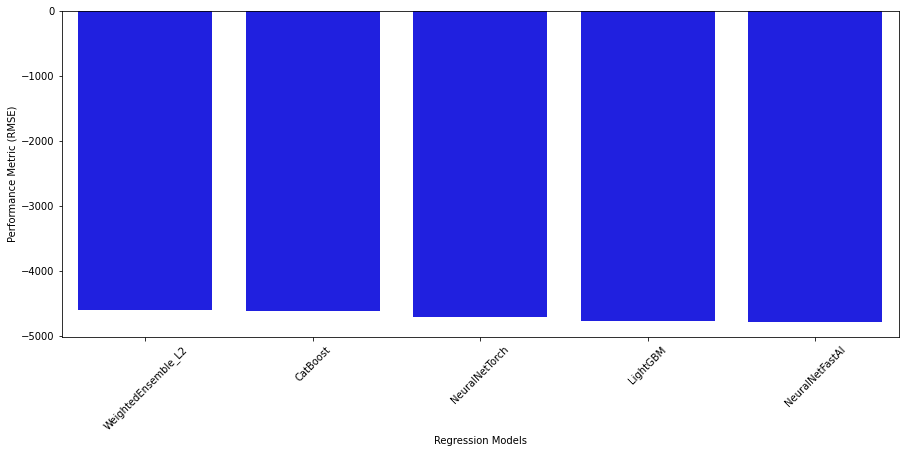

In [38]:
predictor = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'rmse').fit(train_data = X_train, time_limit = 300, presets = "optimize_for_deployment")
predictor.fit_summary()
predictor.leaderboard()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (RMSE)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

predictor.evaluate(X_test)